# Band index calculation <img align="right" src="image/gistda.png" width="200" height="200">
 - [Set parameters for load data](#Set-parameters-for-load-data)
 - [Explore image](#Explore-image)
 - [Index calculation](#Index-calculation)
 - [Select time step](#Select-time-step)
 - [Plot result](#Plot-result)

In index that we can calculate comprise of NDVI, GNDVI, LAI, RVI, SR, SAVI, MSAVI, NDWI, WI, DVI, EVI,and BAI.

### Import package

In [12]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog
from dream_river.indices import cal_index
from dream_river.plotimg import rgb

In [13]:
# connect to datacube
dc = datacube.Datacube(app='Image_segmentation')

### Set parameters to load data

In [14]:
query = {"product": "ls8_collections_sr_scene",
         "measurements": ['blue','green','red',"nir"],
         "y": (13.84, 14.32),
         "x": (100.20, 101.00),
         "time": ("2020-08-20","2020-08-30"),
         "resolution": (-30,30),
         "output_crs": "EPSG:32647"
        }

In [15]:
# Loading data using dc.load()
ds = dc.load(**query)
ds

<xarray.Dataset>
Dimensions:      (time: 2, y: 1791, x: 2893)
Coordinates:
  * time         (time) datetime64[ns] 2020-08-29T03:37:54 2020-08-29T03:38:18
  * y            (y) float64 1.584e+06 1.584e+06 1.584e+06 ... 1.53e+06 1.53e+06
  * x            (x) float64 6.294e+05 6.294e+05 ... 7.161e+05 7.162e+05
    spatial_ref  int32 32647
Data variables:
    blue         (time, y, x) int16 485 485 483 489 ... -9999 -9999 -9999 -9999
    green        (time, y, x) int16 795 791 840 852 ... -9999 -9999 -9999 -9999
    red          (time, y, x) int16 719 753 731 694 ... -9999 -9999 -9999 -9999
    nir          (time, y, x) int16 2935 2783 3115 3474 ... -9999 -9999 -9999
Attributes:
    crs:           EPSG:32647
    grid_mapping:  spatial_ref

### Explore image

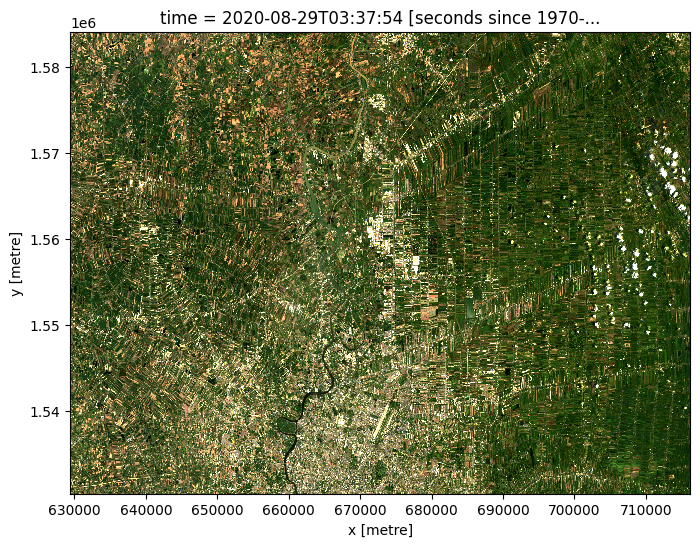

In [23]:
# Plot as an RGB image select first timestep 
rgb(ds, bands=['red','green', 'blue'], index=[0])

### Index calculation
In this case, We will calculate the vegetation index that compose of DVI, NDVI, SR, SAVI, LAI, EVI, respectively.

You can select indinces by you own.

### Load index for the dataset

In [17]:
# Calculate multiple indices and drop original bands
ds_index = cal_index(ds, 
                    index=['DVI','NDVI', 'SR', 'SAVI', 'LAI','EVI'],  
                    collection='ls8_collections_sr_scene')
# explore data
ds_index

<xarray.Dataset>
Dimensions:      (time: 2, y: 1791, x: 2893)
Coordinates:
  * time         (time) datetime64[ns] 2020-08-29T03:37:54 2020-08-29T03:38:18
  * y            (y) float64 1.584e+06 1.584e+06 1.584e+06 ... 1.53e+06 1.53e+06
  * x            (x) float64 6.294e+05 6.294e+05 ... 7.161e+05 7.162e+05
    spatial_ref  int32 32647
Data variables:
    blue         (time, y, x) int16 485 485 483 489 ... -9999 -9999 -9999 -9999
    green        (time, y, x) int16 795 791 840 852 ... -9999 -9999 -9999 -9999
    red          (time, y, x) int16 719 753 731 694 ... -9999 -9999 -9999 -9999
    nir          (time, y, x) int16 2935 2783 3115 3474 ... -9999 -9999 -9999
    DVI          (time, y, x) float64 0.2216 0.203 0.2384 0.278 ... 0.0 0.0 0.0
    NDVI         (time, y, x) float64 0.6065 0.5741 0.6199 ... -0.0 -0.0 -0.0
    SR           (time, y, x) float64 4.082 3.696 4.261 5.006 ... 1.0 1.0 1.0
    SAVI         (time, y, x) float64 0.3841 0.3567 0.4043 ... -0.0 -0.0 -0.0
    LAI          (time, y, x) float64 1.355 1.226 1.436 ... -0.118 -0.118 -0.118
    EVI          (time, y, x) float64 0.407 0.3714 0.4294 0.4975 ... 0.0 0.0 0.0
Attributes:
    crs:           EPSG:32647
    grid_mapping:  spatial_ref

### Select time step 

select time step to plot image.

In [18]:
# select time step 1 that time = 0 ([0,1,2,...])
ds_time = ds_index.isel(time = 0)

# explore data
ds_time

<xarray.Dataset>
Dimensions:      (y: 1791, x: 2893)
Coordinates:
    time         datetime64[ns] 2020-08-29T03:37:54
  * y            (y) float64 1.584e+06 1.584e+06 1.584e+06 ... 1.53e+06 1.53e+06
  * x            (x) float64 6.294e+05 6.294e+05 ... 7.161e+05 7.162e+05
    spatial_ref  int32 32647
Data variables:
    blue         (y, x) int16 485 485 483 489 454 451 ... 276 264 285 244 250
    green        (y, x) int16 795 791 840 852 828 845 ... 630 604 618 525 514
    red          (y, x) int16 719 753 731 694 615 609 ... 392 387 452 364 356
    nir          (y, x) int16 2935 2783 3115 3474 3734 ... 3723 3147 3049 3413
    DVI          (y, x) float64 0.2216 0.203 0.2384 ... 0.2695 0.2685 0.3057
    NDVI         (y, x) float64 0.6065 0.5741 0.6199 ... 0.7488 0.7867 0.8111
    SR           (y, x) float64 4.082 3.696 4.261 5.006 ... 6.962 8.376 9.587
    SAVI         (y, x) float64 0.3841 0.3567 0.4043 ... 0.4701 0.4787 0.5229
    LAI          (y, x) float64 1.355 1.226 1.436 1.682 ... 1.659 1.694 1.904
    EVI          (y, x) float64 0.407 0.3714 0.4294 ... 0.491 0.5008 0.5589
Attributes:
    crs:           EPSG:32647
    grid_mapping:  spatial_ref

As the result abrove, There are data variables of each index that you select on input.

## Plot index result

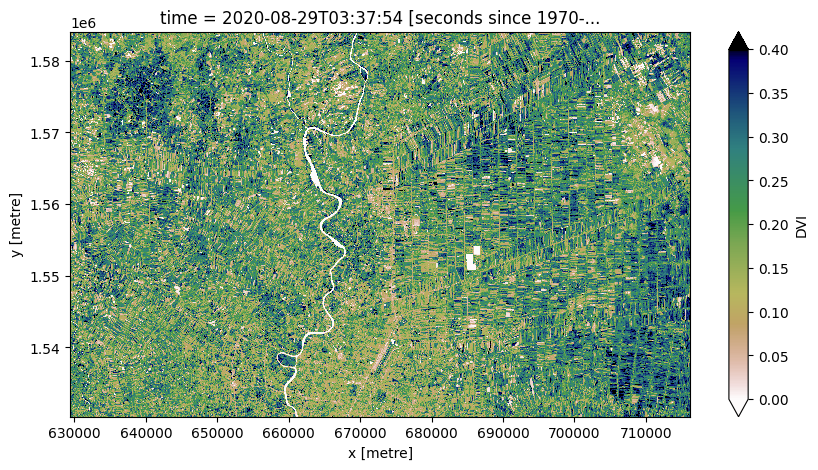

In [19]:
# Plot the results to inspect
# select DVI index
ds_time.DVI.plot(vmin=0, vmax=0.4, cmap='gist_earth_r', figsize=(10, 5))

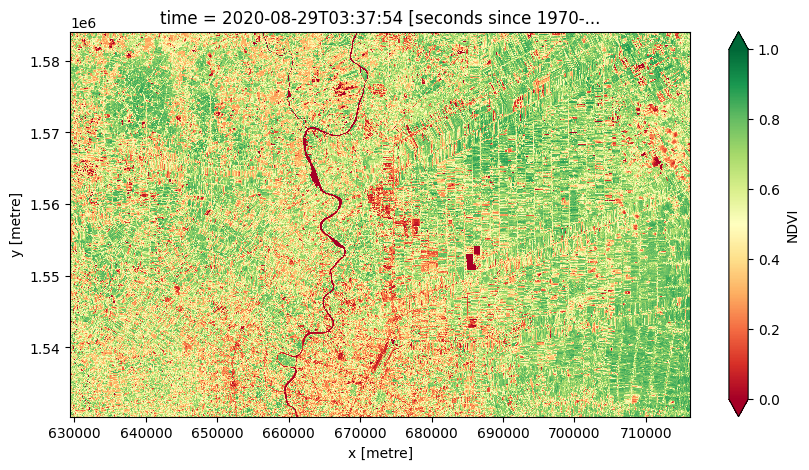

In [20]:
# select NDVI index
ds_time.NDVI.plot(vmin=0, vmax=1, cmap = 'RdYlGn', figsize=(10, 5))

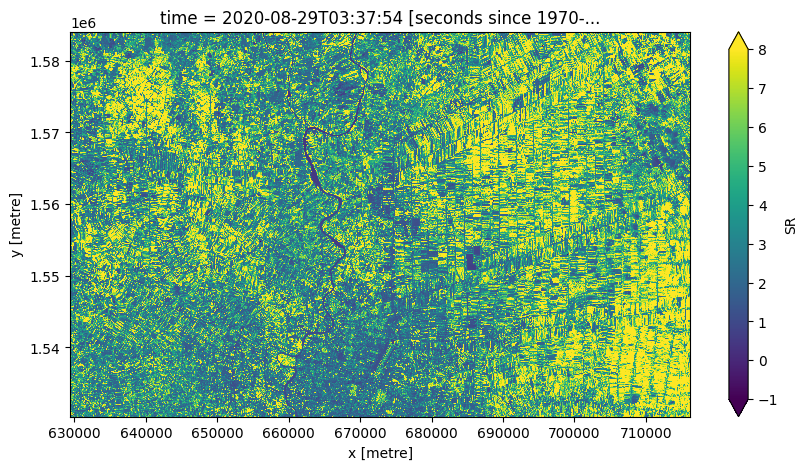

In [21]:
# select SR index
ds_time.SR.plot(vmin=-1, vmax=8, cmap = 'viridis', figsize=(10, 5))

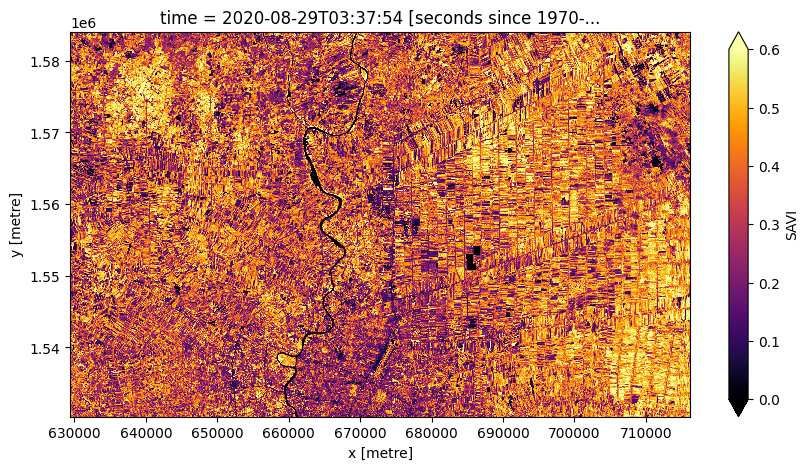

In [22]:
# select SAVI index
ds_time.SAVI.plot(vmin=0, vmax=0.6, cmap='inferno', figsize=(10, 5))